In [1]:
import tensorflow as tf

In [18]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization

## Dataset Exploration

In [3]:
cif_data = tf.keras.datasets.cifar10

In [4]:
dir(cif_data)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [5]:
cif_data.load_data

<function keras.src.datasets.cifar10.load_data()>

In [6]:
a,b = cif_data.load_data()

In [7]:
a[0].shape

(50000, 32, 32, 3)

In [8]:
a[1].shape

(50000, 1)

In [9]:
train = a

In [10]:
b[0].shape

(10000, 32, 32, 3)

In [11]:
b[1].shape

(10000, 1)

In [12]:
test = b

In [13]:
train_x = train[0]
train_y = train[1]

test_x = test[0]
test_y = test[1]

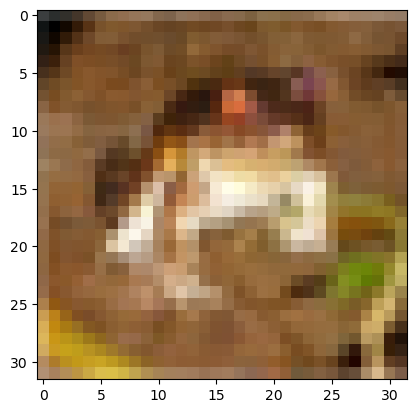

In [14]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0],cmap='gray')

In [15]:
train_y[0]

array([6], dtype=uint8)

In [16]:
#Normalize the data
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

## Build the model

In [19]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(train_x, train_y, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
1250/1250 - 6s - loss: 1.9659 - accuracy: 0.3033 - val_loss: 1.7739 - val_accuracy: 0.3724 - 6s/epoch - 5ms/step
Epoch 2/50
1250/1250 - 5s - loss: 1.7731 - accuracy: 0.3631 - val_loss: 1.9264 - val_accuracy: 0.3225 - 5s/epoch - 4ms/step
Epoch 3/50
1250/1250 - 5s - loss: 1.7283 - accuracy: 0.3821 - val_loss: 1.7118 - val_accuracy: 0.3790 - 5s/epoch - 4ms/step
Epoch 4/50
1250/1250 - 5s - loss: 1.7037 - accuracy: 0.3904 - val_loss: 1.7395 - val_accuracy: 0.3883 - 5s/epoch - 4ms/step
Epoch 5/50
1250/1250 - 6s - loss: 1.6910 - accuracy: 0.3980 - val_loss: 1.6176 - val_accuracy: 0.4311 - 6s/epoch - 4ms/step
Epoch 6/50
1250/1250 - 6s - loss: 1.6691 - accuracy: 0.4032 - val_loss: 1.5750 - val_accuracy: 0.4389 - 6s/epoch - 4ms/step
Epoch 7/50
1250/1250 - 6s - loss: 1.6462 - accuracy: 0.4113 - val_loss: 1.5799 - val_accuracy: 0.4471 - 6s/epoch - 5ms/step
Epoch 8/50
1250/1250 - 5s - loss: 1.6268 - accuracy: 0.4189 - val_loss: 1.5612 - val_accuracy: 0.4443 - 5s/epoch - 4ms/step
Epoch 9/

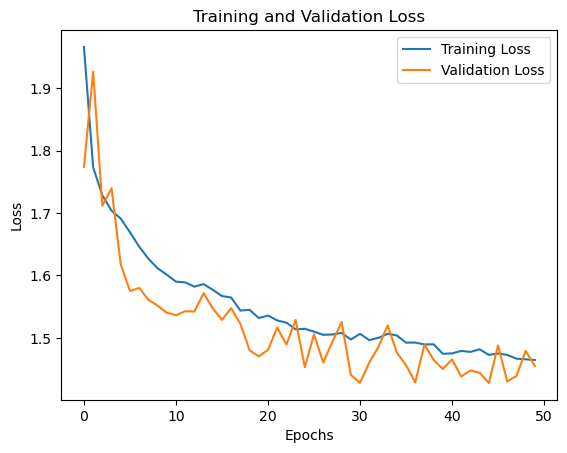

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

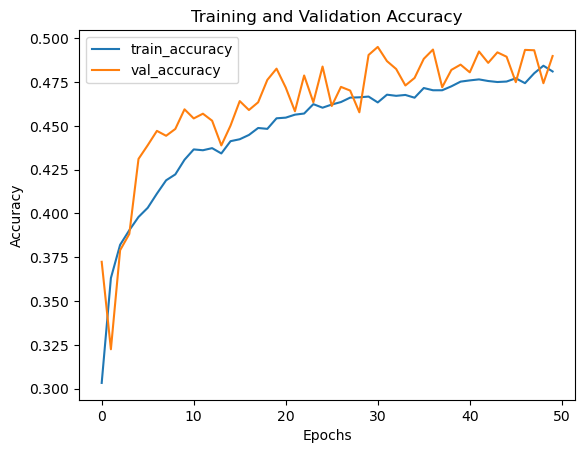

In [23]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

313/313 - 0s - loss: 1.4304 - accuracy: 0.4901 - 401ms/epoch - 1ms/step
